In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# Neural Networks

### Interpreting the linear function as a neural network

In the last example we tried to classify our data into two categories by maximising and minimizing the following function:

\begin{align}
F = f(\mathbf{X},\mathbf{Y})=A\mathbf{X}+B\mathbf{Y}+C
\end{align}

where, $\mathbf{X}$ and $\mathbf{Y}$ are the input vectors, and $A$, $B$ and $C$ are the parameters that we are trying to learn.

<img src="img/neural_networks_16.png" alt="drawing" width="400"/>

The function $f$, we have been using in our last example was not an arbitrary choice. This type of function is very common in machine learning, and it is used to model an element of a neural network called a neuron or a unit.

#### Origins of neural networks: Perceptrons

Perceptron networks are the precursor of the contemporary neural networks we use today. Let's see how they work. A __perceptron__ is a small computational unit that takes several binary inputs, $X_1, X_2,…$, and produces a single binary output. The image below illustrates a perceptron with 3 binary inputs, although the number of inputs is not restricted. 

<img src="img/neural_networks_19.png" alt="drawing" width="350"/>

How can we use perceptrons to do something useful? Let's say that we are trying to formally decide whether to do something or not. For example, we might want to decide whether to go and see a movie, or not. We could for example think of three aspects that are relevant to the decision, and define them as questions. For example: is the weather nice or not, do your friends like it or not, do you like the main actor/actress or not. The answers to these questions could only be yes or no, or in computer terms 1 or 0. Such yes (1) or no (0) answers that are relevant to decide what the output will be are taken as inputs $X_1, X_2,…$ of the perceptron. The perceptron's binary output should evaluate the inputs and tell us whether to go to the movies (1) or not (0).

Certain aspects of our decision making might be more or less important than the others. For example, an aspect reflected in the input $X_1$ could be more important to you than the aspect $X_2$. You could, for example, think that what your friends think of the movie is twice as important than how the weather is. To implement this in the perceptron model, each input is multiplied by a real number that reflects its importance. If an aspect $X_1$ is more important then the aspect $X_2$, then $X_2$  should be multiplied by a larger number than $X_1$. The number with which we multiply an input is called a _weight_. 

Finally, to decide whether the decision will be positive or negative, the weighted sum of all the inputs must be compared to some value which will be the final decision factor. We can temporarily call this value a _threshold_. Let's say that our threshold is the number `3.5`. Once we sum our decisions multiplied by their respective weights, we get a real number value. If the value is less or equal to `3.5`, the perceptron outputs `0`, which indicates we shouldn't do the thing. If the value is larger than `3.5`, the perceptron outputs `1` which indicates we should do the thing.

<img src="img/neural_networks_20.png" alt="drawing" width="400"/>

We can represent the output of a neuron algebraically:

\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j W_j X_j \leq \text{ threshold} \\
      1 & \mbox{if } \sum_j W_j X_j > \text{ threshold}
      \end{array} \right.
\end{eqnarray}

Let's simplify the way we describe perceptrons, by making two notational changes. The first change is to write $\sum_j W_j X_j$ in terms of vectors as a dot product, $w \cdot x \equiv \sum_j w_j x_j$, where $w$ and $x$ are vectors whose components are the weights and inputs, respectively. The second change is to move the threshold to the other side of the inequality and to replace it by what's known as the perceptron's __bias__, $B \equiv
-\mbox{threshold}$. Using the bias instead of the threshold, the perceptron rule can be rewritten:

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } W\cdot X + B \leq 0 \\
      1 & \mbox{if } W\cdot X + B > 0
    \end{array}
  \right.
\end{eqnarray}

This change is reflected in the following diagram.

<img src="img/neural_networks_21.png" alt="drawing" width="400"/>

You can think of the bias as a measure of how easy it is to get the perceptron to output 1. For a perceptron with a really big positive bias, it's extremely easy for the perceptron to output 1, as the weighted sum plus a large positive value, easily gets larger than 0. But if the bias is very negative, then it's difficult for the perceptron to output a 1, as the large negative value will pull the output to be less than 0.

If we would like to use perceptrons for classification like we did before, we run into a problem. To minimise or maximise a function of multiple inputs we need partial derivatives. The derivative shows us how the output of the function changes in terms of inputs if we slightly nudge one of the inputs. The problem with perceptrons is that their binary decision making aspect make them intrinsically insensitive to the small changes of inputs. To differentiate a function, after all, it needs to be smooth and continuous, not discreete. A tiny change of one of our inputs can cause the output of a neuron to abruptly change from 0 to 1 or vice versa. That will then spawn over the entire network of neurons and cause unpredictable changes.

We can overcome this problem by changing the architecture of our neural network. Instead of binary inputs, and outputs, we can now think of all the values within the neuron as *real numbers*. Instead of thinking of the criteria for going to the movies in terms of simple yes or no, we can refine think of it in terms of probabilities, where 0 is the least probable, and 1 is the most probable, but there are also values in between to choose from. This also applies to the output which no longer can be expressed in binary terms. This part we replace with the so called _activation function_, which maps its input smoothly to an output in between 0 and 1.  With this change, the small changes in the neuron's weights and bias cause only a small change in the neuron's output. That's the crucial fact which will allow a network of neurons to learn.

<img src="img/neural_networks_22.png" alt="drawing" width="400"/>

### Classification by using a two-layer Neural Network

In our classification taks, we used the function  $F = f(\mathbf{X},\mathbf{Y})=A\mathbf{X}+B\mathbf{Y}+C$. Now you can see that this function is a simplified neuron without the activation function. Its inputs are $\mathbf{X}$ and $\mathbf{Y}$, their corresponding weights are $A$ and $B$, and $C$ represents the bias. 

A neural network works by connecting multiple neurons in a network. Unlike a single neuron, a network of neurons is capable of creating smoother, non-linear decision boundaries between data points belonging to different categories we are interested to predict. Our network will contain 4 neurons, distributed in 3 layers. The first layer contains the inputs, and is called the __input layer__. The second layer, called a __hidden layer__, comprises of 2 identical neurons, $n_1$, and $n_2$, each multiplying our input data points $\mathbf{X}$ and $\mathbf{Y}$ by a different set of parameters $A_i, B_i, C_i$, where $i=1,2$. The third layer, called the __output layer__ contains a single neuron $s$ that multiplies the outputs $N_1$, and $N_2$ of the previous neurons  by a new set of parameters $A_3$, $B_3$, and $C_3$, and outputs the result $S$, like shown on the following diagram.

<img src="img/neural_networks_23.png" alt="drawing" width="650"/>

In machine learning this scheme is usually simplified as following:

<img src="img/neural_networks_24.png" alt="drawing" width="400"/>

As an activation function we will again be using sigmoid function $\sigma(x)$ defined as:

$$
\sigma = \frac{1}{1+e^{-x}}\\
$$

and defined in code as:

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Let us construct a new dataset containing 2D points:

In [3]:
data2 = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0]])

With each point, there is a label `1` or `-1` is associated:

In [4]:
labels2 = np.array([ 1,
                    -1,
                     1,
                    -1,
                    -1,
                     1,
                    -1,
                     1,
                    -1,
                    -1])

We can plot this data by using the function `plot_data`:

In [5]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    nudge = 0.08
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

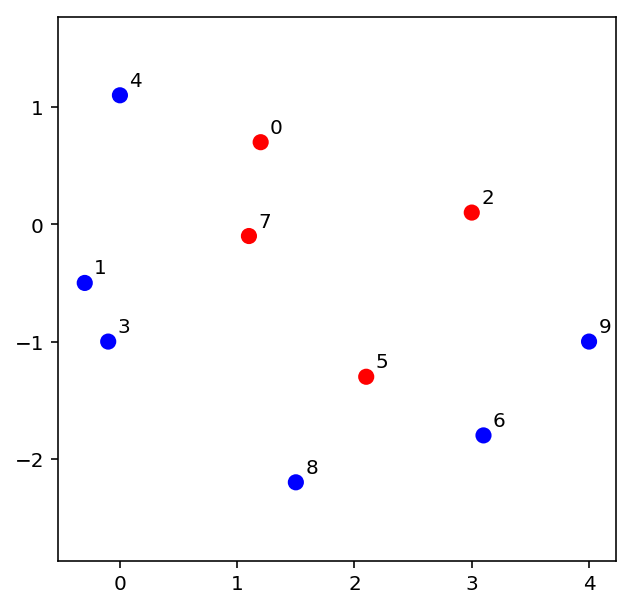

In [6]:
plot_data(data2, labels2)

Here, the data is structured such that a linear classifier wouldn't be able to apropriately classify it.

Now let's initialise the parameters of the network. This be done very efficiently with matrices, but here for the sake of clarifying the procedure we will initialise them manually with separate variables that take normally distributed random values between 0 and 1:

In [7]:
# generating a random data set
rnd = np.random.normal(size=9)

# hidden layer neuron 1
A1 = rnd[0] #weight for X
B1 = rnd[1] #weight for Y
C1 = rnd[2] #bias

# hidden layer neuron 2
A2 = rnd[3] #weight for X
B2 = rnd[4] #weight for Y
C2 = rnd[5] #bias

# output layer neuron
A3 = rnd[6] #weight for n1
B3 = rnd[7] #weight for n2
C3 = rnd[8] # bias

print (A1, B1, C1, A2, B2, C2, A3, B3, C3)

0.7566485514420692 0.002725779569172881 0.4076987155211042 0.10770685308094682 -0.8309211754969811 0.17043072781064242 -2.0621777482806545 0.620219798994706 1.43868497651903


#### Computing the forward pass

With the given weights, biases and data points, we need to compute the final output (activation) of the function  $S = s(\mathbf{X},\mathbf{Y})$. We can accomplish that manually or by evaluating a function `forward_pass`:

In [8]:
def forward_pass(A1,A2,A3,B1,B2,B3,C1,C2,C3,X,Y):
    N1 = sigmoid(A1*X + B1*Y + C1) # 1st neuron
    N2 = sigmoid(A2*X + B2*Y + C2) # 2nd neuron
    S = A3*N1 + B3*N2 + C3 # final activation
    return S

Let's do it manually first:

If we take the first data point `[ 1.2, 0.7]`:

In [9]:
X, Y = data2[0]
X, Y

(1.2, 0.7)

In [10]:
z1 = A1*X + B1*Y + C1
z2 = A2*X + B2*Y + C2
N1 = sigmoid(z1) # 1st neuron
N2 = sigmoid(z2) # 2nd neuron
S = A3*N1 + B3*N2 + C3 # final activation

the output will be:

In [11]:
S

0.07875823603547283

We should get the same result by evaluating the function `forward_pass`:

In [12]:
forward_pass(A1,A2,A3,B1,B2,B3,C1,C2,C3,X,Y)

0.07875823603547283

#### Computing the backward pass

By analysing the image, let's compute the derivatives:

<img src="img/neural_networks_23.png" alt="drawing" width="650"/>

The simplest to compute are the derivatives in respect to the weights $A_3$, $B_3$, and the bias $C_3$, $\frac{\partial S}{\partial A_3}$, $\frac{\partial S}{\partial B_3}$ and $\frac{\partial S}{\partial C_3}$:

\begin{align*}
\frac{\partial S}{\partial A_3} &=N_1; &\frac{\partial S}{\partial B_3} &=N2; &\frac{\partial S}{\partial C_3}&=1;\\\\
\end{align*}

In [13]:
dA3, dB3, dC3 = N1, N2, 1
print (f'dA3: {dA3}\ndB3: {dB3}\ndC3: {dC3}')

dA3: 0.78877963667698
dB3: 0.4299718825501192
dC3: 1


In order to proceed to the weights and biases in the first layer, we need to compute derivatives in respect to the activations $N_1$ and $N_2$: $\frac{\partial S}{\partial N_1}$ and $\frac{\partial S}{\partial N_2}$:

\begin{align*}
\frac{\partial S}{\partial N_1} &=A_3 &\frac{\partial S}{\partial N_2} &=B_3
\end{align*}

In [14]:
dN1, dN2 = A3, B3
print (f'dN1: {dN1}\ndN2: {dN2}')

dN1: -2.0621777482806545
dN2: 0.620219798994706


To determine the derivatives in respect to the bias $C_1$ and the weights $A_1$ and $B_1$ we need to use chain rule as before:  

\begin{align*}
\frac{\partial S}{\partial C_1} &=\frac{\partial S}{\partial N_1}*\frac{\partial N_1}{\partial z_1}*1
&\frac{\partial S}{\partial A_1} &=\frac{\partial S}{\partial N_1}*\frac{\partial N_1}{\partial z_1}*1*\mathbf{X}; &\frac{\partial S}{\partial B_1} &=\frac{\partial S}{\partial N_1}*\frac{\partial N_1}{\partial z_1}*1*\mathbf{Y};\\\\
\end{align*}

\begin{align*}
\frac{\partial S}{\partial C_1} &=\frac{\partial S}{\partial N_1}*N_1*(1-N_1);
&\frac{\partial S}{\partial A_1} &=\frac{\partial S}{\partial N_1}*N_1*(1-N_1)*\mathbf{X}; &\frac{\partial S}{\partial B_1} &=\frac{\partial S}{\partial N_1}*N_1*(1-N_1)*\mathbf{Y};\\\\
\end{align*}

As the term $\frac{\partial S}{\partial N_1}*N_1*(1-N_1)$ figures in all three partial derivatives, we can take that as an advantage and make it into a common variable `dZ1`:

In [15]:
dZ1 = dN1 * N1*(1-N1)
dZ1

-0.3435718487979292

This makes it east to compute the derivatives $\frac{\partial S}{\partial C_1}$, $\frac{\partial S}{\partial A_1}$, and $\frac{\partial S}{\partial B_1}$:

In [16]:
dA1 = dZ1*X
dB1 = dZ1*Y
dC1 = dZ1*1
print (f'dA1: {dA1}\ndB1: {dB1}\ndC1: {dC1}')

dA1: -0.412286218557515
dB1: -0.2405002941585504
dC1: -0.3435718487979292


As in the previous case, to determine the derivatives in respect to the bias $C_2$ and the weights $A_2$ and $B_2$ we need to use chain rule:

\begin{align*}
\frac{\partial S}{\partial C_2} &=\frac{\partial S}{\partial N_2}*\frac{\partial N_2}{\partial z_2}*1;
&\frac{\partial S}{\partial A_2} &=\frac{\partial S}{\partial N_2}*\frac{\partial N_2}{\partial z_2}*1*\mathbf{X}; &\frac{\partial S}{\partial B_2} &=\frac{\partial S}{\partial N_2}*\frac{\partial N_2}{\partial z_2}*1*\mathbf{Y};\\\\
\end{align*}

\begin{align*}
\frac{\partial S}{\partial C_2} &=\frac{\partial S}{\partial N_2}*N_2*(1-N_2);
&\frac{\partial S}{\partial A_2} &=\frac{\partial S}{\partial N_2}*N_2*(1-N_2)*\mathbf{X}; &\frac{\partial S}{\partial B_2} &=\frac{\partial S}{\partial N_2}*N_1*(1-N_2)*\mathbf{Y};\\\\
\end{align*}

As the term $\frac{\partial S}{\partial N_2}*N_2*(1-N_2)$ figures in all three partial derivatives, we can take that as an advantage and make it into a common variable `dZ2`:

In [17]:
dZ2 = dN2 * N2*(1-N2)
dZ2

0.15201343078338642

This makes it east to compute the derivatives $\frac{\partial S}{\partial C_2}$, $\frac{\partial S}{\partial A_2}$, and $\frac{\partial S}{\partial B_2}$:

In [18]:
dA2 = dZ2*X
dB2 = dZ2*Y
dC2 = dZ2*1
print (f'dA2: {dA2}\ndB2: {dB2}\ndC2: {dC2}')

dA2: 0.18241611694006368
dB2: 0.10640940154837049
dC2: 0.15201343078338642


Depending on the given label, we will need to multiply our derivatives `dA1`, `dB1`, `dC1`, `dA2`, `dB2`, `dC2`, `dA3`, `dB3` and `dC3` with either `-1` or `+1` depending on the given situation. In the algorithm, we will introduce a new variable `pull` that can be set to  `1` or `-1`. 

Now let's test if we are able to successfully increase the function $S=s(\mathbf{X},\mathbf{Y})$. Our original score was:

In [19]:
forward_pass(A1,A2,A3,B1,B2,B3,C1,C2,C3,X,Y)

0.07875823603547283

In order to gradually maximize the function $s$ towards our desired result, we need to update all of our  parameters (weights and biases). This is done by adding to the parameter's value the value of its partial derivative. To achieve this gradually in small steps, we multiply the value of the partial derivative by a a small number (step).

In [20]:
step_size = 0.01
A1 = A1 + dA1 * step_size
B1 = B1 + dB1 * step_size
C1 = C1 + dC1 * step_size
A2 = A2 + dA2 * step_size
B2 = B2 + dB2 * step_size
C2 = C2 + dC2 * step_size
A3 = A3 + dA3 * step_size
B3 = B3 + dB3 * step_size
C3 = C3 + dC3 * step_size

If we now evaluate the function $f(\mathbf{X},\mathbf{Y})$, with the updated parameters $A$, $B$, and $C$, we get:

In [21]:
forward_pass(A1,A2,A3,B1,B2,B3,C1,C2,C3,X,Y)

0.10096610562552

This result should better then the original result!

***

#### A simple neural network algorithm

Now we can put these elements together in a working algorithm:

In [22]:
def train_linear_classifier(data, labels, step_size, reg_strength, no_loops, iter_info):
    rnd = np.random.normal(size=9)

    # hidden layer neuron 1
    A1 = rnd[0] #weight for X
    B1 = rnd[1] #weight for Y
    C1 = rnd[2] #bias

    # hidden layer neuron 2
    A2 = rnd[3] #weight for X
    B2 = rnd[4] #weight for Y
    C2 = rnd[5] #bias

    # output layer neuron
    A3 = rnd[6] #weight for n1
    B3 = rnd[7] #weight for n2
    C3 = rnd[8] # bias
    
    grid = create_meshgrid(data)

    for i in range(no_loops):
        # get a single random data point
        index = np.random.randint(data.shape[0])
        # get X, Y of that data point and its label
        X,Y = data[index]
        label = labels[index]

        # forward pass
        N1 = sigmoid(A1*X + B1*Y + C1) # 1st neuron
        N2 = sigmoid(A2*X + B2*Y + C2) # 2nd neuron
        S = A3*N1 + B3*N2 + C3 # final activation

        pull = 0.0
        if (label == 1 and S < 1):
            pull = 1.0
        if (label ==-1 and S > -1):
            pull = -1.0

        # backpropagating through the network
        # output layer weights and biases
        dA3, dB3, dC3 = pull*N1, pull*N2, pull*1

        #second layer activations
        dN1, dN2 = pull*A3, pull*B3

        # intermediate values
        dz1 = dN1 * N1 * (1 - N1)
        dz2 = dN2 * N2 * (1 - N2)

        # second layer neuron 1
        dA1 = dz1*X
        dB1 = dz1*Y
        dC1 = dz1*1

        # second layer neuron 2
        dA2 = dz2*X
        dB2 = dz2*Y
        dC2 = dz2*1

        #regularization
        dA1 += -A1*reg_strength; dA2 += -A2*reg_strength; dA3 += -A3*reg_strength;
        dB1 += -B1*reg_strength; dB2 += -B2*reg_strength; dB3 += -B3*reg_strength;

        # finally, do the parameter update
        A1 += step_size * dA1; 
        B1 += step_size * dB1; 
        C1 += step_size * dC1;
        A2 += step_size * dA2; 
        B2 += step_size * dB2;
        C2 += step_size * dC2;
        A3 += step_size * dA3; 
        B3 += step_size * dB3; 
        C3 += step_size * dC3;

        if (i%iter_info==0):
            accuracy = eval_accuracy_neural((A1,A2,A3,B1,B2,B3,C1,C2,C3),data,labels)
            plot_neural_simple((A1,A2,A3,B1,B2,B3,C1,C2,C3),grid, data, labels, i, accuracy)
        
    return (A1, A2, A3, B1, B2, B3, C1, C2, C3)
            
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def eval_accuracy_neural(params, data, labels):
    A1, A2, A3, B1, B2, B3, C1, C2, C3 = params
    num_correct = 0;
    data_len = data.shape[0]
    
    for i in range(data_len):
        X,Y = data[i]
        true_label = labels[i]
        score = forward_pass(A1, A2, A3, B1, B2, B3, C1, C2, C3, X, Y)
        predicted_label = 1 if score > 0 else -1
        
        if (predicted_label == true_label):
            num_correct += 1
    return num_correct / data_len

def plot_neural_simple(params, grid,data, labels, iteration, accuracy):
    nudge = 0.06
    A1, A2, A3, B1, B2, B3, C1, C2, C3 = params
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            X, Y = xx[i][j],yy[i][j]
            score = forward_pass(A1, A2, A3, B1, B2, B3, C1, C2, C3, X, Y) 
            score = 1 if score > 0 else -1
            Z[i][j] = score

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the iteration {iteration}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.bwr,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

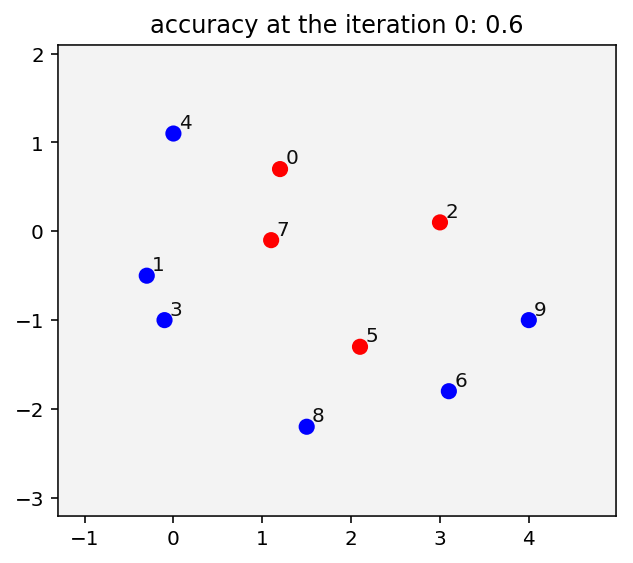

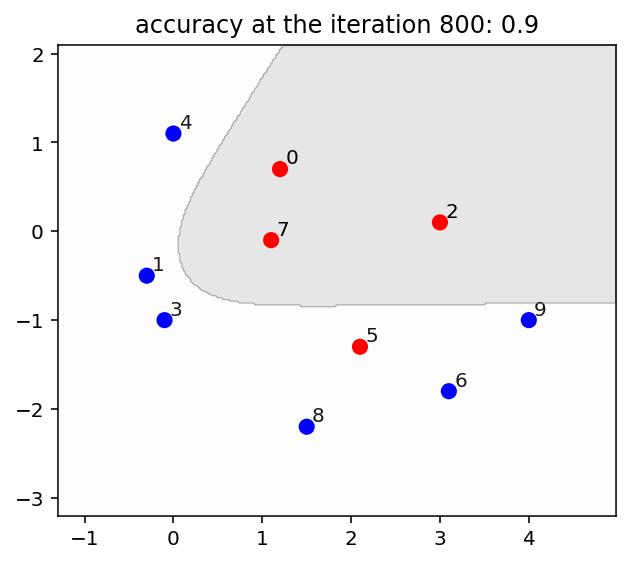

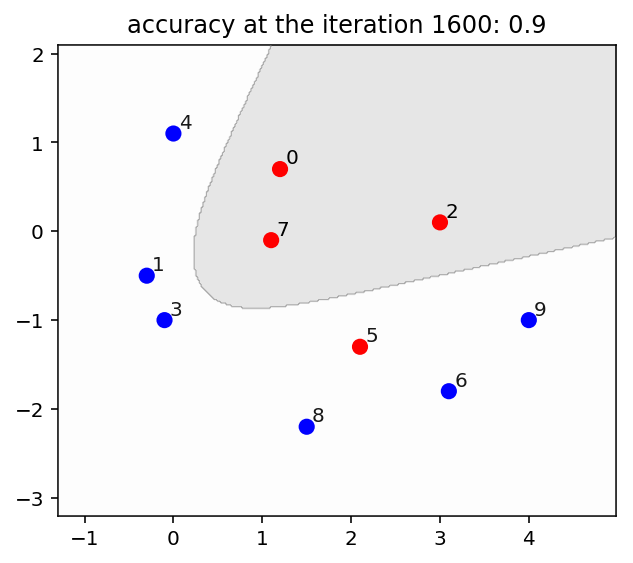

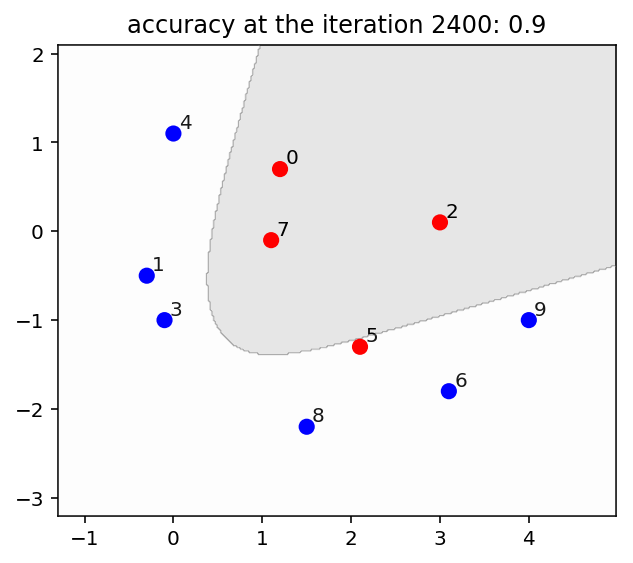

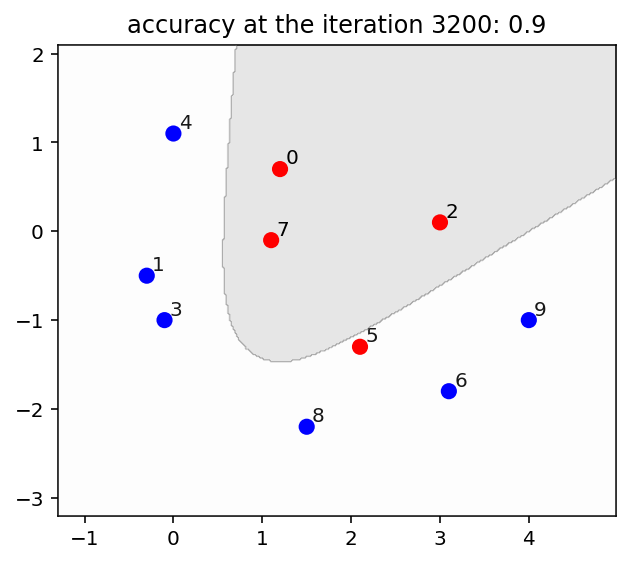

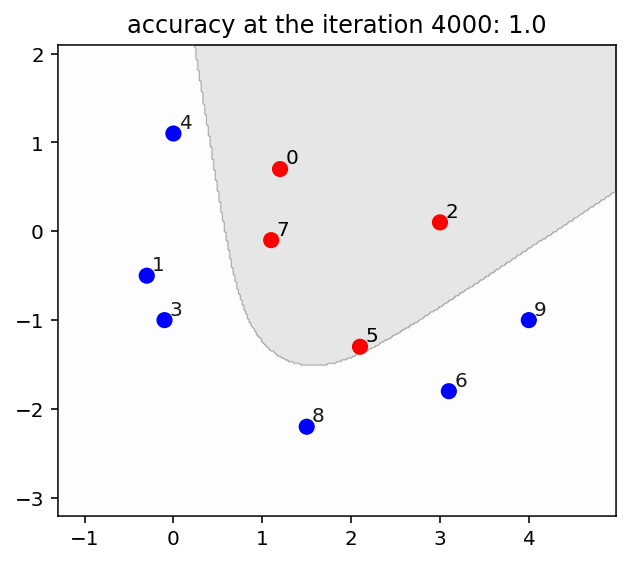

In [23]:
train_2 = train_linear_classifier(data2, labels2, 0.1, 0.001, 4001, 800)

In [24]:
a1,a2,a3,b1,b2,b3,c1,c2,c3 = train_2
for i, ((x,y), label) in enumerate(zip(data2, labels2)):
    s = forward_pass(a1,a2,a3,b1,b2,b3,c1,c2,c3,x,y)
    s = 1 if s > 0 else -1
    print (f'data point {i}: real label : {label}, pred. label: {s}, {(s==label)}')

data point 0: real label : 1, pred. label: 1, True
data point 1: real label : -1, pred. label: -1, True
data point 2: real label : 1, pred. label: 1, True
data point 3: real label : -1, pred. label: -1, True
data point 4: real label : -1, pred. label: -1, True
data point 5: real label : 1, pred. label: 1, True
data point 6: real label : -1, pred. label: -1, True
data point 7: real label : 1, pred. label: 1, True
data point 8: real label : -1, pred. label: -1, True
data point 9: real label : -1, pred. label: -1, True
